In [1]:
import numpy as np
import sys
import os
import glob
import getpass
import argparse
import pickle
import matplotlib.cm as cm
import matplotlib.pyplot as plt


In [14]:
from utils import save_dir, analyze_dir
model_identifier = 'NN-tree_nclass=96_nobj=96000_nhier=6_beta=0.0_sigma=0.83_nfeat=3072-train_test-fixed'
analyze_identifier= 'mftma-exm_per_class=50-proj=False-rand=False-kappa=0-n_t=300-n_rep=1'

In [6]:
data_=pickle.load(open(os.path.join(save_dir,model_identifier, f'{model_identifier}_mftma_pooled.pkl'), 'rb'))

In [15]:
analyze_dir

'/om/group/evlab/Greta_Eghbal_manifolds/analyze/'

In [66]:
mftma_res=data_['mftma_results']
len(mftma_res)

4

In [16]:
if not os.path.exists(os.path.join(analyze_dir,model_identifier,analyze_identifier)):
        os.makedirs(os.path.join(analyze_dir,model_identifier,analyze_identifier))

In [17]:
mftma_res.keys()

dict_keys(['layer_0_Input', 'layer_1_Linear', 'layer_2_Linear', 'layer_3_Linear'])

In [86]:
temp=(mftma_res['layer_0_Input'])


In [ ]:
#[dict_keys(['capacities', 'radii', 'dimensions', 'correlations', 'layer', 'n_hier_class', 'hierarchy'])

In [36]:
[len(x['mftma']) for x in mftma_res['layer_0_Input']]

array([6])

In [108]:
temp=[np.asarray([x['seq'] for x in mftma_res[y]]) for y in mftma_res.keys()]
y=temp[0]
for k in temp:
    y=np.intersect1d(y,k)

In [120]:
temp=[[x['mftma'][0]['capacities'] for x in mftma_res[y]] for y in mftma_res.keys()]
#temp=temp[1:]

In [125]:
cap=np.stack([[x[int(k)] for k in y ] for x in temp]).squeeze()
cap.shape

(4, 423)

In [114]:
h0=cm.get_cmap('viridis_r',len(np.unique(epochs)))
h0_c=np.flipud(h0(np.arange(len(np.unique(epochs)))/len(np.unique(epochs))))
h1=cm.get_cmap('plasma_r',len(np.unique(epochs)))
h1_c=np.flipud(h1(np.arange(len(np.unique(epochs)))/len(np.unique(epochs))))

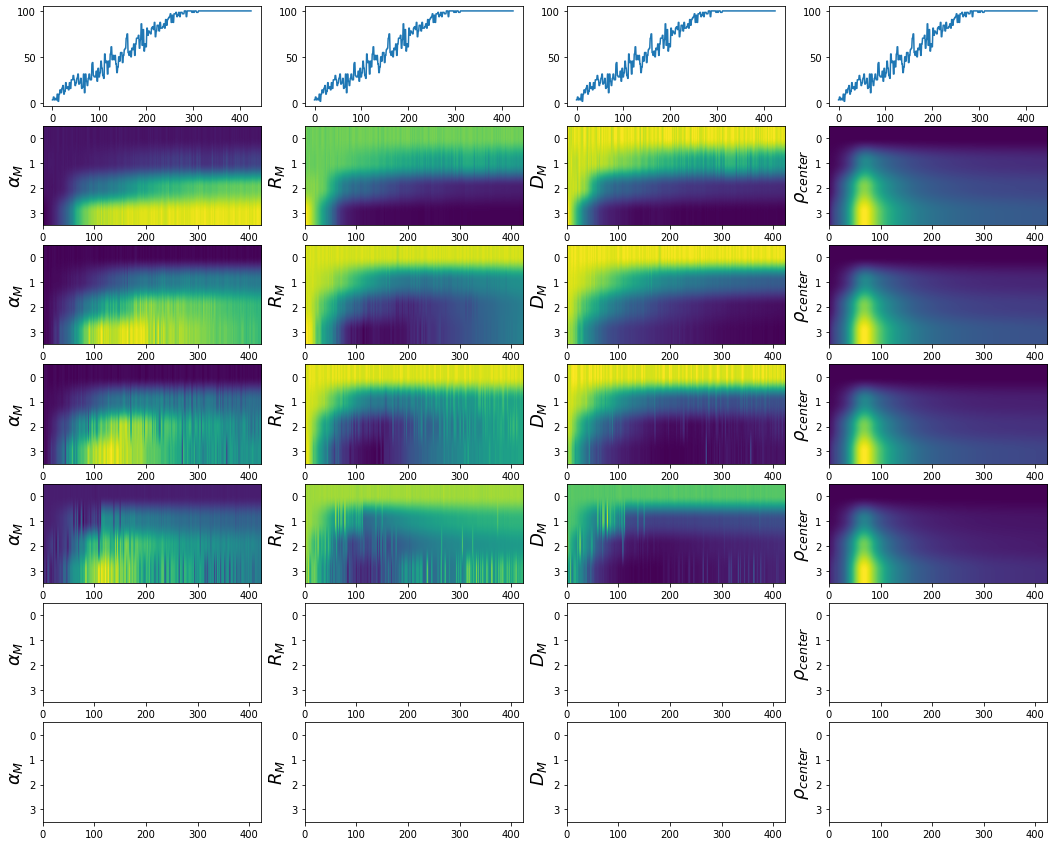

<Figure size 432x288 with 0 Axes>

In [134]:
num_hier=np.unique([len(x['mftma']) for x in mftma_res['layer_0_Input']])
fig, axes = plt.subplots(int(num_hier)+1, 4, figsize=(18, 15))
axes=axes.flatten()
#fig.tight_layout(rect=[0, 0.03, 1, 0.95])
seq=[x['seq'] for x in mftma_res['layer_0_Input']]
accu=[x['test_acc'] for x in mftma_res['layer_0_Input']]
for k in range(4):
    axes[k].plot(seq,accu)

for k in range(int(num_hier)):
    temp=[[x['mftma'][k]['capacities'] for x in mftma_res[y]] for y in mftma_res.keys()]
    cap=np.stack([[x[int(k)] for k in y ] for x in temp]).squeeze()
    axes[4*(k+1)].imshow(cap,aspect='auto')
    axes[4*(k+1)].set_ylabel(r'$\alpha_M$', fontsize=18)
    
    
    
    temp=[[x['mftma'][k]['radii'] for x in mftma_res[y]] for y in mftma_res.keys()]
    rad=np.stack([[x[int(k)] for k in y ] for x in temp]).squeeze()
    axes[4*(k+1)+1].imshow(rad,aspect='auto')
    axes[4*(k+1)+1].set_ylabel(r'$R_M$', fontsize=18)
    temp=[[x['mftma'][k]['dimensions'] for x in mftma_res[y]] for y in mftma_res.keys()]
    dim=np.stack([[x[int(k)] for k in y ] for x in temp]).squeeze()
    axes[4*(k+1)+2].imshow(dim,aspect='auto')
    axes[4*(k+1)+2].set_ylabel(r'$D_M$', fontsize=18)
    temp=[[x['mftma'][k]['correlations'] for x in mftma_res[y]] for y in mftma_res.keys()]
    cor=np.stack([[x[int(k)] for k in y ] for x in temp]).squeeze()
    axes[4*(k+1)+3].imshow(cor,aspect='auto')
    axes[4*(k+1)+3].set_ylabel(r'$\rho_{center}$', fontsize=18)
plt.show()
plt.tight_layout()
fig.savefig(os.path.join(analyze_dir,model_identifier,analyze_identifier,'manifold_vals_during_training.png'),transparent=True)

In [154]:
 ax[0].plot(np.squeeze(cap_epoch)[:,0], linewidth=3,c=h0_c[k-1,:],label=str(k))
    ax[0].set_title('hierarchy level=0')
    ax[1].plot(np.squeeze(rad_epoch)[:,0], linewidth=3,c=h0_c[k-1,:],label=str(k))
    ax[2].plot(np.squeeze(dim_epoch)[:,0], linewidth=3,c=h0_c[k-1,:],label=str(k))
    ax[3].plot(np.squeeze(corr_epoch)[:,0], linewidth=3,c=h0_c[k-1,:],label=str(k))
    ax[0].set_ylabel(r'$\alpha_M$', fontsize=18)
    ax[1].set_ylabel(r'$R_M$', fontsize=18)
    ax[2].set_ylabel(r'$D_M$', fontsize=18)
    ax[3].set_ylabel(r'$\rho_{center}$', fontsize=18)
    # second hierarchy 
    ax[4].set_title('hierarchy level=1')
    ax[4].plot(np.squeeze(cap_epoch)[:,1], linewidth=3,c=h0_c[k-1,:],label=str(k))
    ax[5].plot(np.squeeze(rad_epoch)[:,1], linewidth=3,c=h0_c[k-1,:],label=str(k))
    ax[6].plot(np.squeeze(dim_epoch)[:,1], linewidth=3,c=h0_c[k-1,:],label=str(k))
    ax[7].plot(np.squeeze(corr_epoch)[:,1], linewidth=3,c=h0_c[k-1,:],label=str(k))
    ax[4].set_ylabel(r'$\alpha_M$', fontsize=18)
    ax[5].set_ylabel(r'$R_M$', fontsize=18)
    ax[6].set_ylabel(r'$D_M$', fontsize=18)
    ax[7].set_ylabel(r'$\rho_{center}$', fontsize=18)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [179]:
[layer_name[int(x)] for x in k_idx][0][0]

'layer_0_Input'